# Exploratory Data Analysis with Well Logs

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import math
import missingno as msno
import numpy as np

In [14]:
data = pd.read_csv('xeek_train_subset.csv')

In [15]:
data['WELL'].nunique()

12

In [ ]:
data['WELL'].unique()

In [ ]:
msno.matrix(data)

In [16]:
data_nan = data[['WELL','DEPTH_MD','CALI', 'BS', 'GR', 'NPHI', 'RHOB', 'PEF', 'RDEP', 'RMED', 'DTC', 'DTS']].copy()
for num, col in enumerate(data_nan.columns[2:]):
    data_nan[col] = data_nan[col].notnull() * (num + 1)
    data_nan[col].replace(0, num, inplace=True)
    print(col, num) #Print out the col name and number to verify it works
grouped = data_nan.groupby('WELL')

CALI 0
BS 1
GR 2
NPHI 3
RHOB 4
PEF 5
RDEP 6
RMED 7
DTC 8
DTS 9


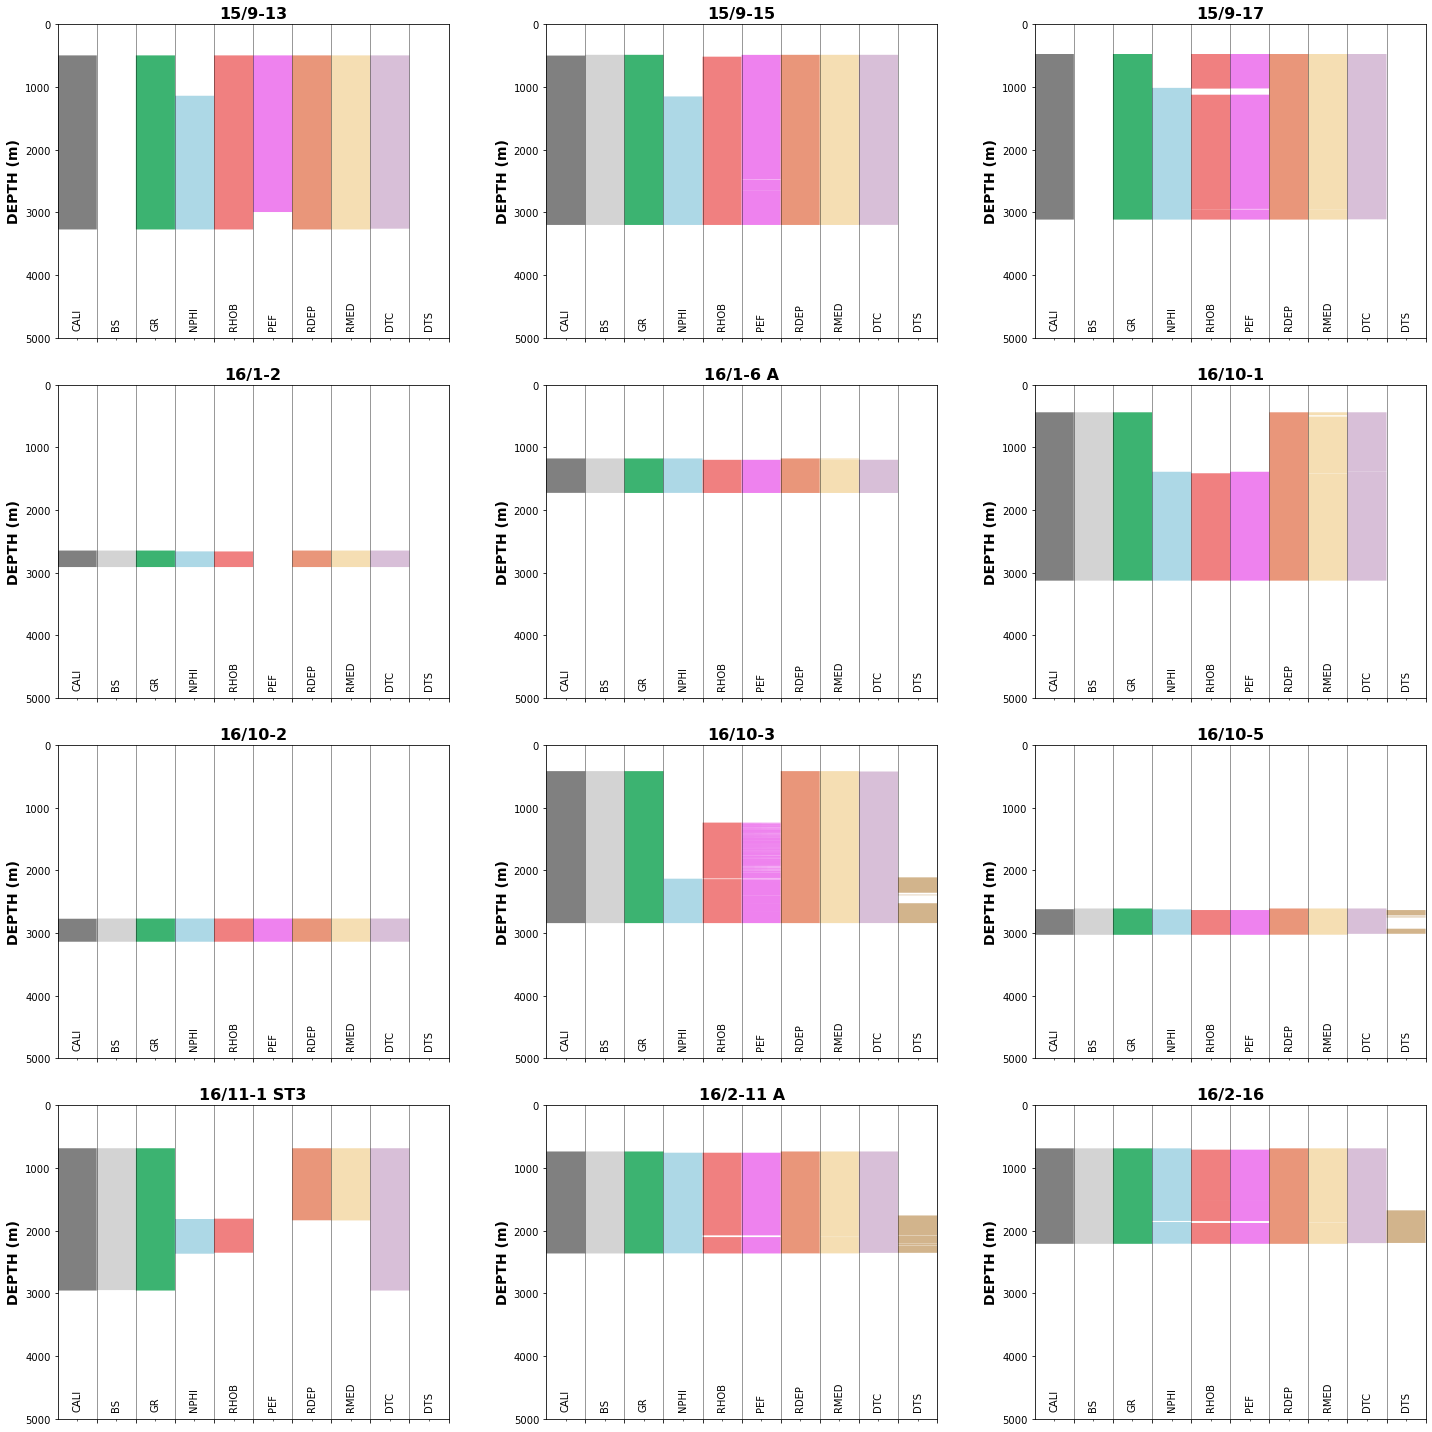

In [18]:
#Setup the labels we want to display on the x-axis
labels = ['CALI', 'BS', 'GR', 'NPHI', 'RHOB', 'PEF', 'RDEP', 'RMED', 'DTC', 'DTS']

#Setup the figure and the subplots
fig, axs = plt.subplots(4, 3, figsize=(20,20))

#Loop through each well and column in the grouped dataframe
for (name, df), ax in zip(grouped, axs.flat):
    ax.set_xlim(0,9)
    
    #Setup the depth range
    ax.set_ylim(5000, 0)
    
    #Create multiple fill betweens for each curve# This is between
    # the number representing null values and the number representing
    # actual values
    
    ax.fill_betweenx(df.DEPTH_MD, 0, df.CALI, facecolor='grey')
    ax.fill_betweenx(df.DEPTH_MD, 1, df.BS, facecolor='lightgrey')
    ax.fill_betweenx(df.DEPTH_MD, 2, df.GR, facecolor='mediumseagreen')
    ax.fill_betweenx(df.DEPTH_MD, 3, df.NPHI, facecolor='lightblue')
    ax.fill_betweenx(df.DEPTH_MD, 4, df.RHOB, facecolor='lightcoral')
    ax.fill_betweenx(df.DEPTH_MD, 5, df.PEF, facecolor='violet')
    ax.fill_betweenx(df.DEPTH_MD, 6, df.RDEP, facecolor='darksalmon')
    ax.fill_betweenx(df.DEPTH_MD, 7, df.RMED, facecolor='wheat')
    ax.fill_betweenx(df.DEPTH_MD, 8, df.DTC, facecolor='thistle')
    ax.fill_betweenx(df.DEPTH_MD, 9, df.DTS, facecolor='tan')
    
    #Setup the grid, axis labels and ticks
    ax.grid(axis='x', alpha=0.5, color='black')
    ax.set_ylabel('DEPTH (m)', fontsize=14, fontweight='bold')
    
    #Position vertical lines at the boundaries between the bars
    ax.set_xticks([1,2,3,4,5,6,7,8,9,10], minor=False)
    
    #Position the curve names in the centre of each column
    ax.set_xticks([0.5, 1.5 ,2.5 ,3.5 ,4.5 ,5.5 ,6.5 , 7.5, 8.5, 9.5], minor=True)
    
    #Setup the x-axis tick labels
    ax.set_xticklabels(labels,  rotation='vertical', minor=True, verticalalignment='bottom')
    ax.set_xticklabels('', minor=False)
    ax.tick_params(axis='x', which='minor', pad=-10)
    
    #Assign the well name as the title to each subplot
    ax.set_title(name, fontsize=16, fontweight='bold')

plt.savefig('missingdata.png')
plt.tight_layout()
plt.subplots_adjust(hspace=0.15, wspace=0.25)
plt.savefig(fname='missingdata.png', dpi=300)

    

In [22]:
lithology_numbers = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}

In [23]:
data['LITH'] = data['FORCE_2020_LITHOFACIES_LITHOLOGY'].map(lithology_numbers)

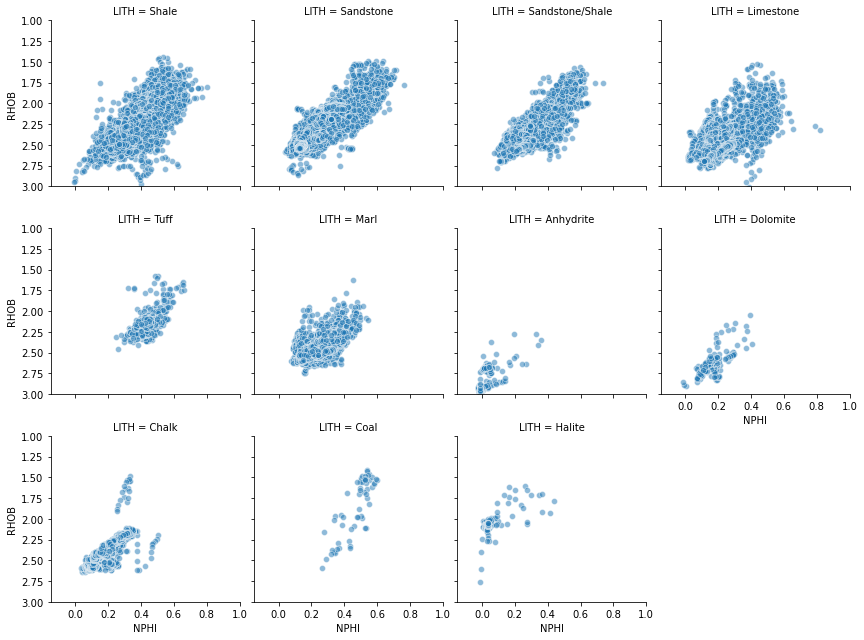

In [24]:
g = sns.FacetGrid(data, col='LITH', col_wrap=4)
g.map(sns.scatterplot, 'NPHI', 'RHOB', alpha=0.5)
g.set(xlim=(-0.15, 1))
g.set(ylim=(3, 1))

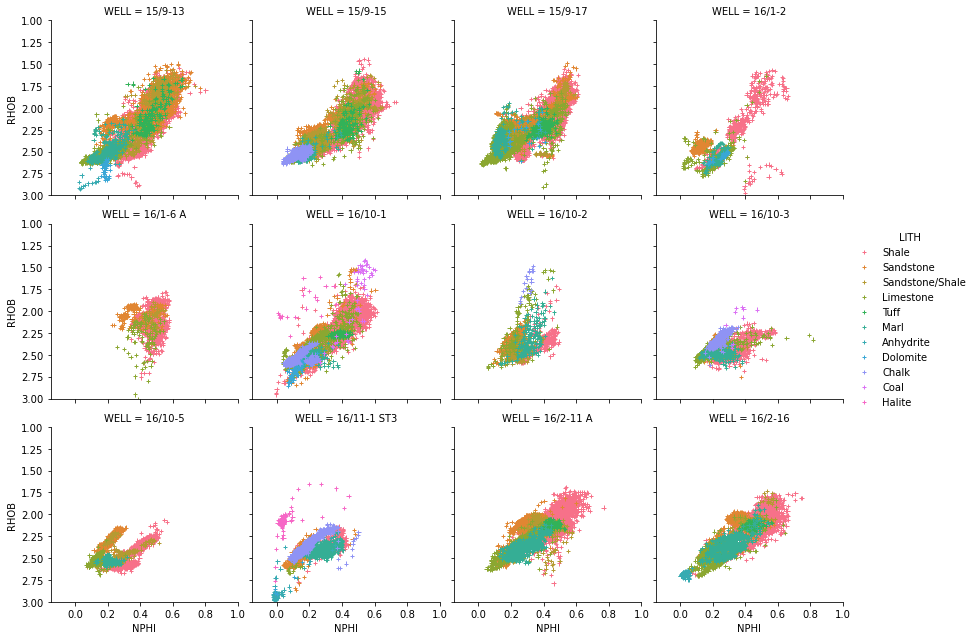

In [27]:
g = sns.FacetGrid(data, col='WELL', hue='LITH', col_wrap=4)
g.map(sns.scatterplot, 'NPHI', 'RHOB', linewidth=1, size=0.1, marker='+')
g.set(xlim=(-0.15, 1))
g.set(ylim=(3, 1))
g.add_legend()

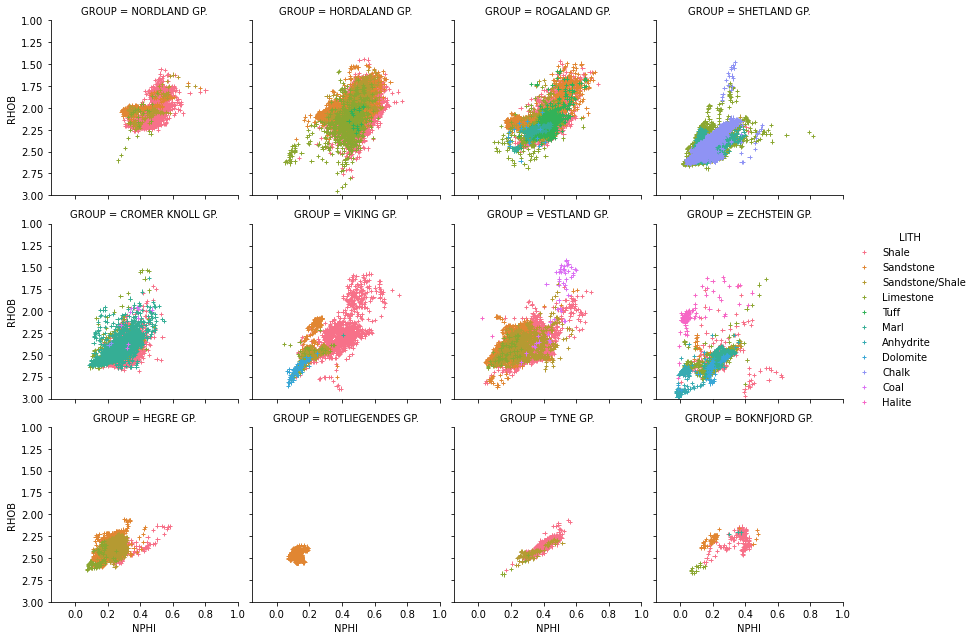

In [28]:
g = sns.FacetGrid(data, col='GROUP', hue='LITH', col_wrap=4)
g.map(sns.scatterplot, 'NPHI', 'RHOB', linewidth=1, size=0.1, marker='+')
g.set(xlim=(-0.15, 1))
g.set(ylim=(3, 1))
g.add_legend()

In [31]:
key_logs = ['CALI', 'GR', 'NPHI', 'RHOB', 'PEF', 'RDEP', 'RMED', 'DTC', 'DTS']

In [32]:
subset = data[key_logs]

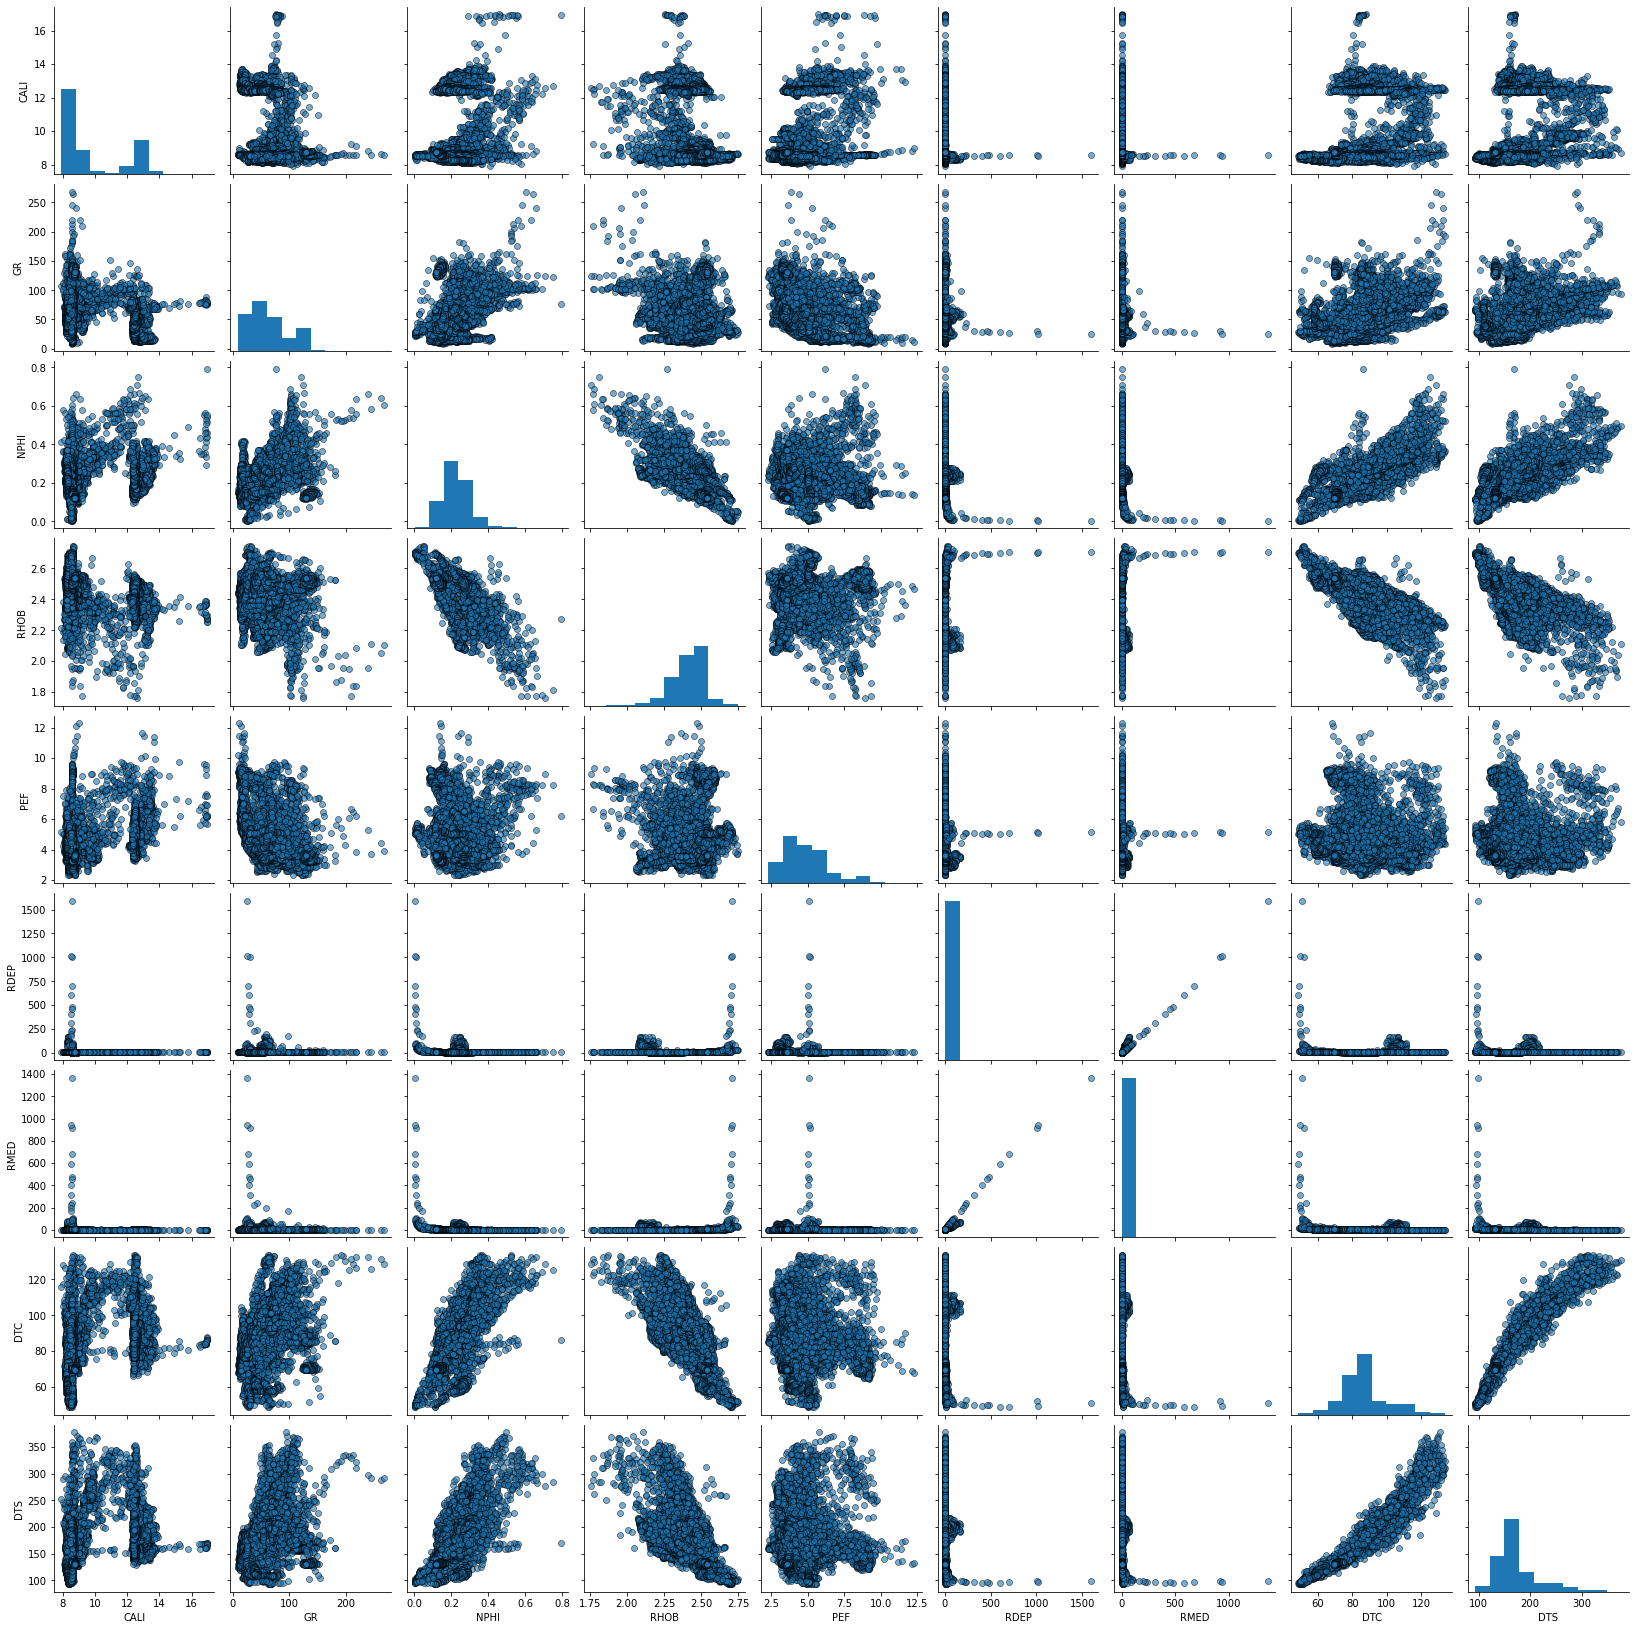

In [33]:
subset = subset.dropna()
sns.pairplot(subset, vars=key_logs, diag_kind='hist', plot_kws={'alpha':0.6, 'edgecolor':'k'})

In [36]:
data['DIF_CAL'] = data['CALI'] - data['BS']

In [35]:
grouped = data.groupby('WELL')

In [34]:
nrows = int(math.ceil(len(grouped)/3.))

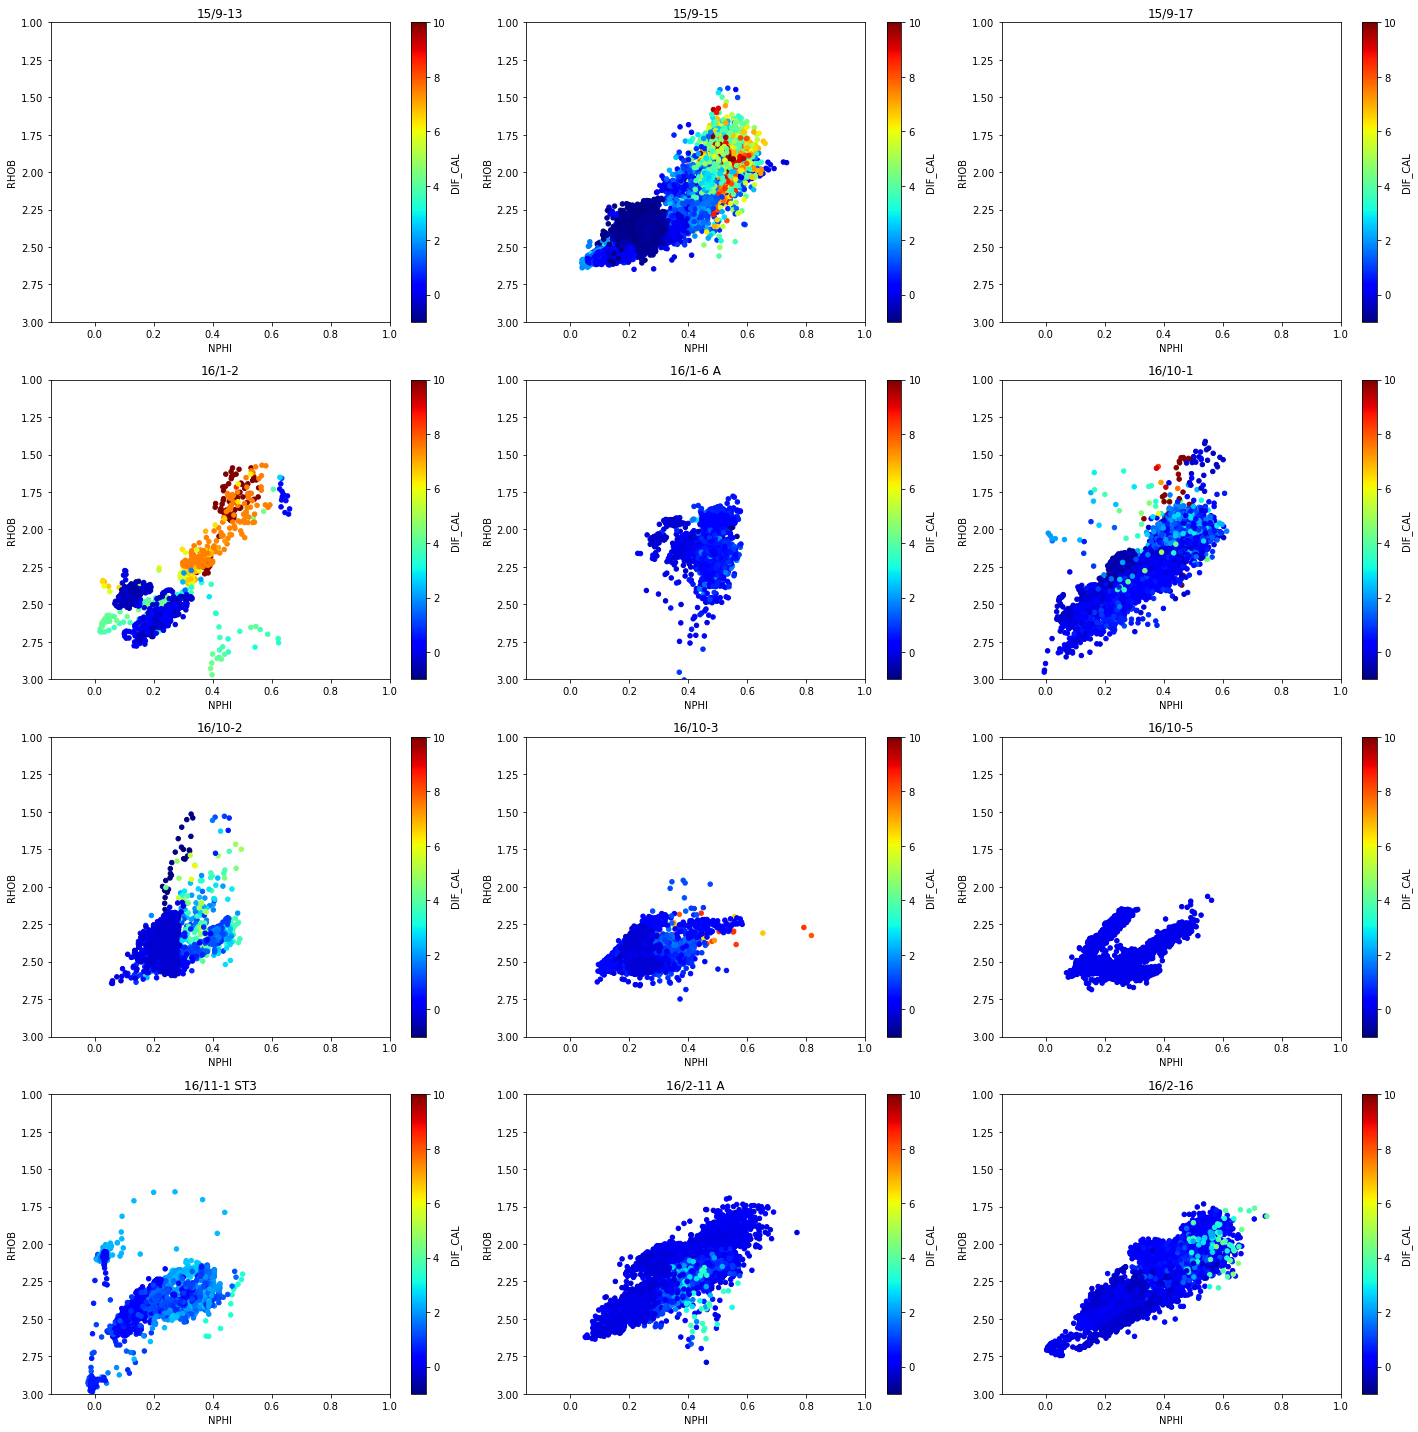

In [37]:
fig, axs = plt.subplots(nrows, 3, figsize=(20,20))
for (name, df), ax in zip(grouped, axs.flat):
    df.plot(kind='scatter', x='NPHI', y='RHOB', ax=ax, c='DIF_CAL', cmap='jet', vmin=-1, vmax=10)
    ax.set_xlim(-0.15,1)
    ax.set_ylim(3,1)
    ax.set_title(name)
plt.tight_layout()

In [38]:
grouped_lith = data.groupby('LITH')

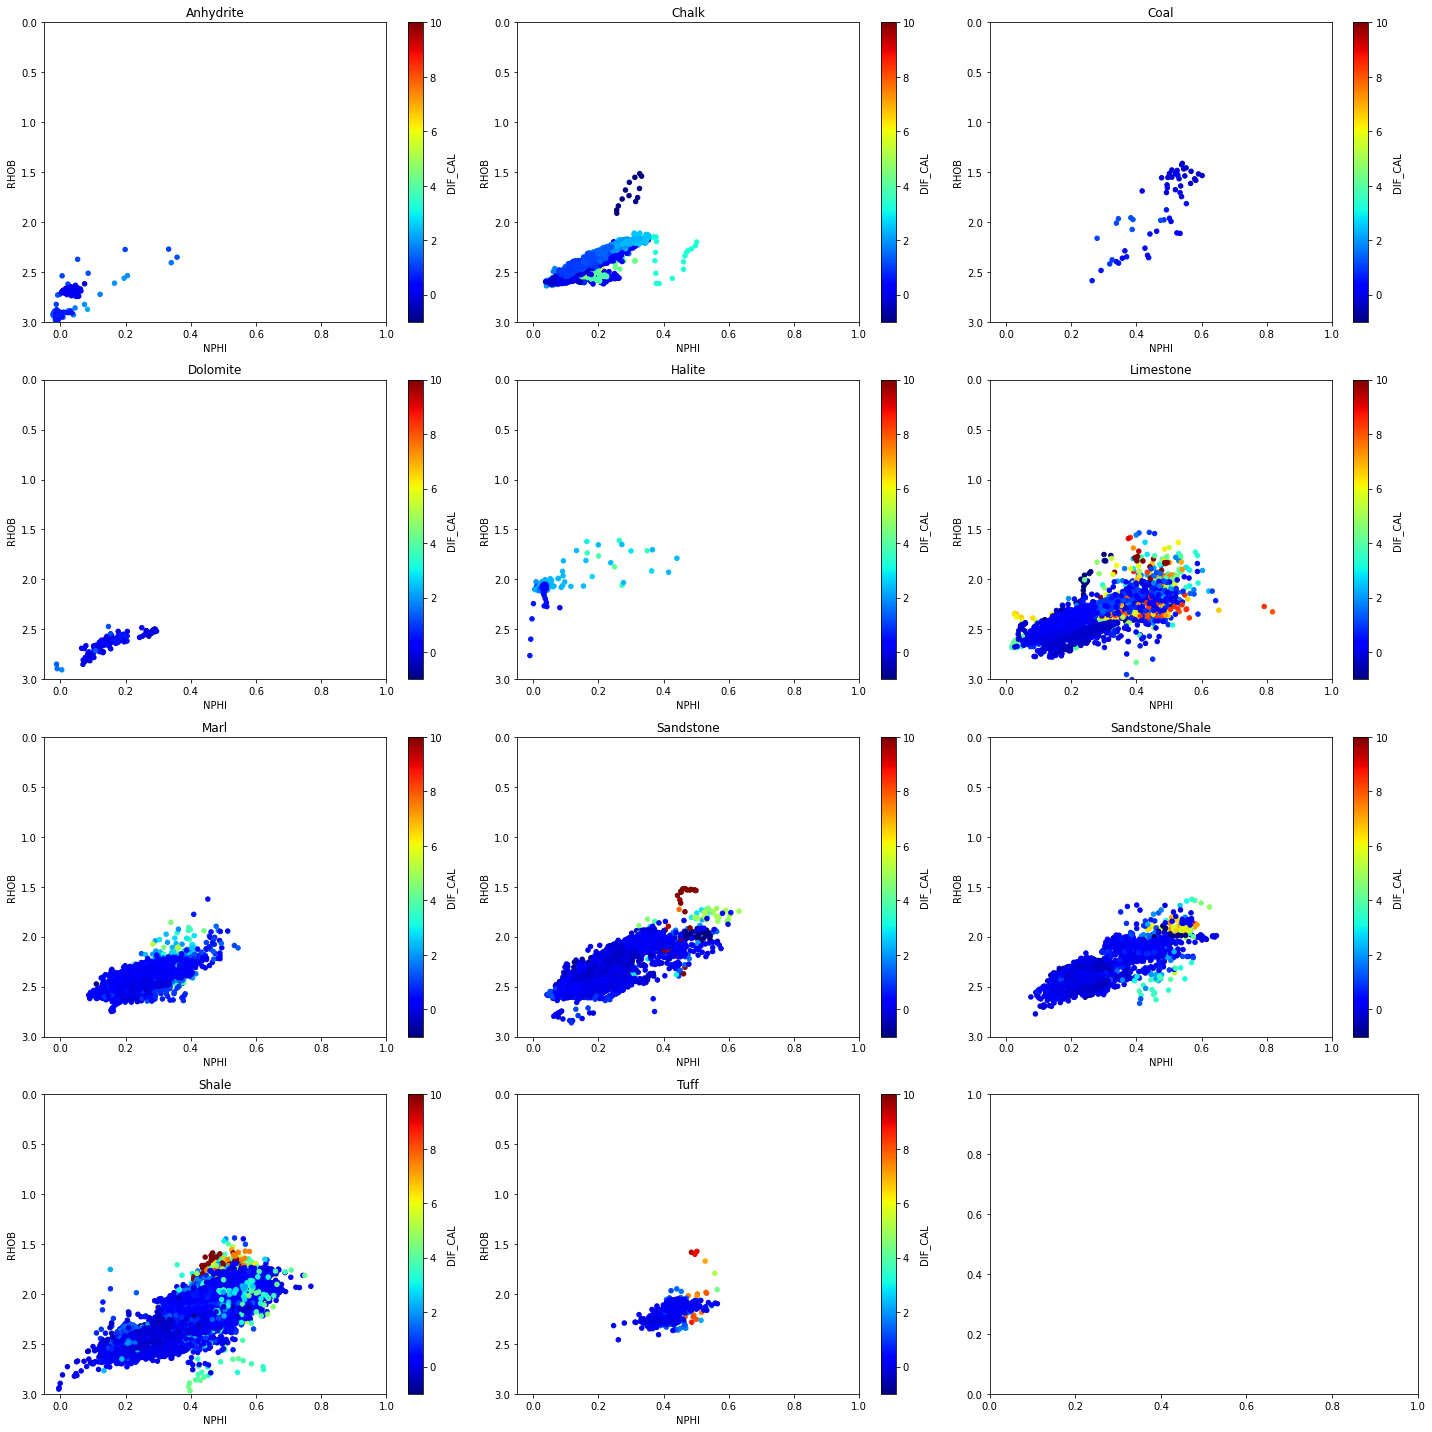

In [39]:
fig, axs = plt.subplots(nrows, 3, figsize=(20,20))
for (name, df), ax in zip(grouped_lith, axs.flat):
    df.plot(kind='scatter', x='NPHI', y='RHOB', c='DIF_CAL', cmap='jet', ax=ax, vmin=-1, vmax=10)
    ax.set_xlim(-0.05,1)
    ax.set_ylim(3,0)
    ax.set_title(name)
plt.tight_layout()